# The pupose of this notebook is to bring in basin map and plot the map.  In the future the gage points and Texas state will be plotted as well.  Eventially I am hoping to create a grid of each basin and calculate each  basin average temperature. 

In [69]:
%matplotlib inline
import random
from random import shuffle, randint
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
import fiona
import numpy as np
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon, MultiPolygon, shape, Point

In [70]:
# We can extract the London Borough boundaries by filtering on the AREA_CODE key
basin_multi = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open('C:\Users\m2echjmh\Desktop\Evap_CURG\Trinity_Subbasins\Subbasin265.shp')if pol['properties']['grid_code'] >= 0])


In [71]:
cm = plt.get_cmap('RdBu')
num_colours = len(mp)

In [72]:
basin_multi

Self-intersection at or near point -775238.03483815491 3768883.1442295052


-826025.437856 2474198.06333 420923.420931 3889946.14029


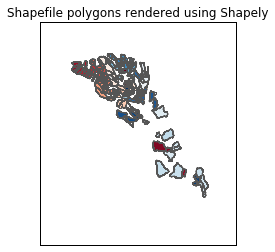

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
minx, miny, maxx, maxy = mp.bounds
print minx, miny, maxx, maxy
w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)
ax.set_aspect(1)
patches = []
for idx, p in enumerate(mp):
    colour = cm(1. * idx / num_colours)
    patches.append(PolygonPatch(p, fc=colour, ec='#555555', alpha=1., zorder=1))
ax.add_collection(PatchCollection(patches, match_original=True))
ax.set_xticks([])
ax.set_yticks([])
plt.title("Shapefile polygons rendered using Shapely")
#plt.savefig('data/london_from_shp.png', alpha=True, dpi=300)
plt.show()

In [74]:
c = fiona.open('C:\Users\m2echjmh\Desktop\Evap_CURG\Trinity_Subbasins\Subbasin265.shp')

In [75]:
c.crs

{u'datum': u'NAD83',
 u'lat_0': 23,
 u'lat_1': 29.5,
 u'lat_2': 45.5,
 u'lon_0': -96,
 u'no_defs': True,
 u'proj': u'aea',
 u'units': u'us-ft',
 u'x_0': 0,
 u'y_0': 0}

In [76]:
c

<open Collection 'C:\Users\m2echjmh\Desktop\Evap_CURG\Trinity_Subbasins\Subbasin265.shp:Subbasin265', mode 'r' at 0x13eef898L>

In [77]:
import geopandas as gp
basin = gp.GeoDataFrame.from_file(
    'C:\Users\m2echjmh\Desktop\Evap_CURG\Trinity_Subbasins\Subbasin265.shp')
basin.head()

Area_HMS    BaseMet  BasinCN  BasinLag  BasinSlope  BubbPress Descriptio  \
0  24.302295  Recession      0.0       0.0    3.074784        0.0       None   
1  19.630595  Recession      0.0       0.0    3.611236        0.0       None   
2  36.867308  Recession      0.0       0.0    3.744468        0.0       None   
3  89.013203  Recession      0.0       0.0    2.442013        0.0       None   
4  13.267644  Recession      0.0       0.0    2.033271        0.0       None   

   DrainID  GW1MaxPer  GW1MaxS    ...      Tc  TotStormP        TransMet  \
0      845        0.0      0.0    ...     0.0        0.0  Modified Clark   
1      359        0.0      0.0    ...     0.0        0.0  Modified Clark   
2       60        0.0      0.0    ...     0.0        0.0  Modified Clark   
3       61        0.0      0.0    ...     0.0        0.0  Modified Clark   
4       72        0.0      0.0    ...     0.0        0.0  Modified Clark   

   WFSuction  WetDeficit  d_BaseMet         d_LossMet      d_TransMet  \
0        0.0         0.0  Recession  Deficit Constant  Modified Clark   
1        0.0         0.0  Recession  Deficit Constant  Modified Clark   
2        0.0         0.0  Recession  Deficit Constant  Modified Clark   
3        0.0         0.0  Recession  Deficit Constant  Modified Clark   
4        0.0         0.0  Recession  Deficit Constant  Modified Clark   

                                            geometry grid_code  
0  POLYGON ((-320119.9099712372 3627938.257812757...         5  
1  POLYGON ((-484588.4192881584 3721245.347444922...         6  
2  POLYGON ((-319037.2326746583 3718095.74121134,...         7  
3  (POLYGON ((-350238.0213228241 3695851.64593583...         8  
4  POLYGON ((-275336.4440921545 3521639.041933924...        19  

[5 rows x 52 columns]

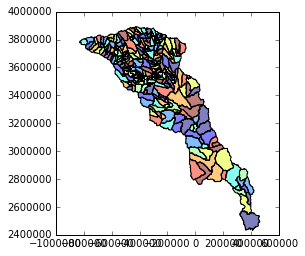

In [78]:
basin.plot()

https://borealperspectives.wordpress.com/2016/03/07/plotting-polygon-shapefiles-on-a-matplotlib-basemap-with-geopandas-shapely-and-descartes/

http://basemaptutorial.readthedocs.io/en/latest/projections.html

http://geopandas.org/set_operations.html